# --------- *Use Case analysis by Martina Martinovic* ----------------
# Classification problem on marketing campaigns in bank

The dataset that we will be working with is from a Portuguese banking institution about its direct marketing campaigns.
This use case solves a classification problem. 

 Goal: to predict, if a client will subscribe a term deposit (denoted in **variable y**) or not.

Contents:

0. Introduction

1. Exploratory Data Analysis

1.1 Install packages and loading data

1.2 Visually inspecting dataset

1.3 Checking data type and empty or "false" cells

1.4 Univariate analysis of qualitative variables which contain "unknown" value

1.5 Univariate analysis of other qualitative variables

1.6 Checkig data distribution of numerical variables

1.6.1 Checkig basic statistic

1.7 Bivariate analysis

1.8 Duplicate values

1.9 Missing values

2. Missing values ("unknown")

3. Duplicate values

2. Feature Engineering and selection

2.1 Numerical variables

2.2 Categorical variables

2.3. Final to do list after exploration

3. Logistic regression

4. Decision tree model

5. Neural network model

6. K-Nearest neighbors


## 0. Introduction

Inside **Bank_Dataset** folder is your datasets, there are two files:
- `short` contains only a 10% of observations, is a subset of the full file.
- `full` contains all observations
The variables explanation below is taken directly from the dataset source. 

### Bank client data:
- `age` (numeric)
- `job` type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- `marital` marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- `default` has credit in default? (categorical: 'no','yes','unknown')
- `housing` has housing loan? (categorical: 'no','yes','unknown')
- `loan` has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
- `contact` contact communication type (categorical: 'cellular','telephone')
- `month` last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- `day_of_week` last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- `duration` last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- `campaign` number of contacts performed during this campaign and for this client (numeric, includes last contact)

### Other attributes :

- `pdays` number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- `previous` number of contacts performed before this campaign and for this client (numeric)
- `poutcome` outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
### Social and economic context attributes
- `emp.var.rate` employment variation rate - quarterly indicator (numeric)
- `cons.price.idx` consumer price index - monthly indicator (numeric)
- `cons.conf.idx` consumer confidence index - monthly indicator (numeric)
- `euribor3m` euribor 3 month rate - daily indicator (numeric)
- `nr.employed` number of employees - quarterly indicator (numeric)

Output variable (desired target):
- `y` has the client subscribed a term deposit? (binary: 'yes','no')

## 1. Exploratory Data Analysis

### 1.1 Install packages and loading data

In [1]:
!pip install missingno


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\mmartinovic\06-DataScienceMasterclass\bank-additional-full\bank-additional-full.csv", sep=";")

### 1.2 Visually inspecting dataset

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


This first view gives some interesting information - for example, pdays is 999, previous is 0

### 1.3 Checking data type and empty or "false" cells

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It appears that there is no "null" values. Let's check for wrong entries like symbols -,?,#,*,etc.

In [7]:
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

age : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
duration : [ 261  149  226 ... 1246 1556 1868]
campaign : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37

We see here that there is no empty values in numerical data type. However, there are many "unknowns" in categorical data type.

### 1.4 Univariate analysis of qualitative variables which contain the "unknown" value

We can notice that there are several qualitative variables which have 'unknown' in value: job, marital, education, default, housing, loan.
Let's analyse what is the total number of this value comparred to other values within the same variable.

C:\Users\mmartinovic\AppData\Local\Temp\ipykernel_33160\856551607.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\mmartinovic\AppData\Local\Temp\ipykernel_33160\856551607.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


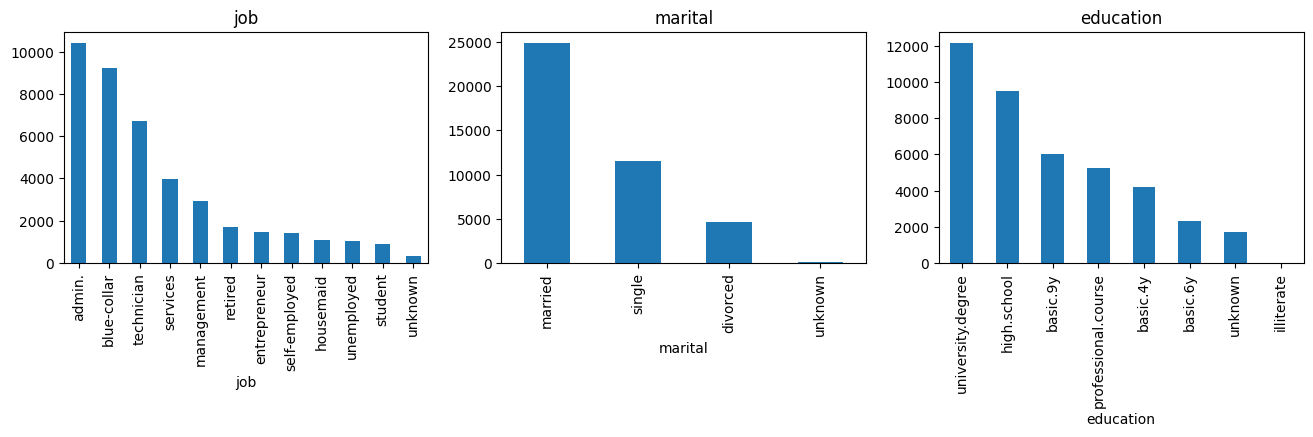

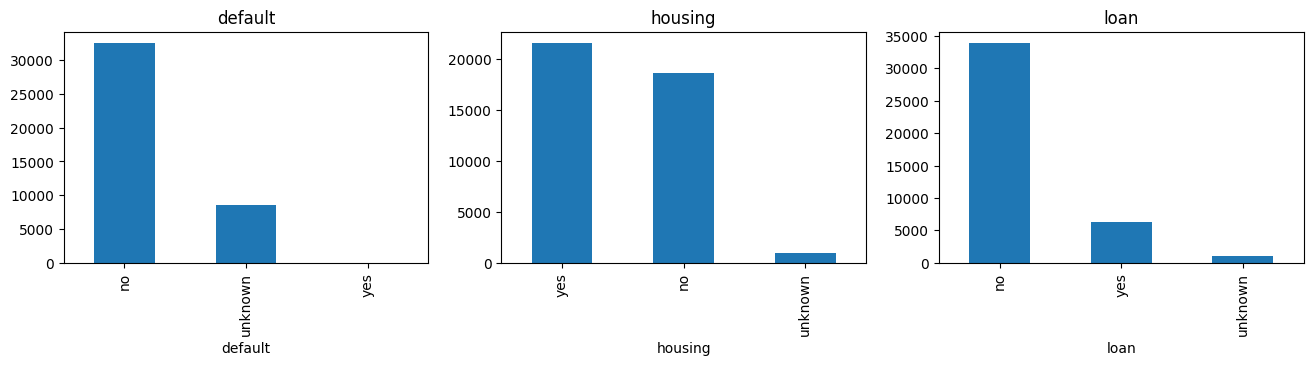

In [8]:
categorical_features = ['job', 'marital', 'education']
fig, ax = plt.subplots(1,len(categorical_features),figsize = (16,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(ax=ax[i], kind="bar").set_title(categorical_feature)
    
fig.show()

categorical_features = ['default', 'housing', 'loan']
fig, ax = plt.subplots(1,len(categorical_features),figsize = (16,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(ax=ax[i], kind="bar").set_title(categorical_feature)
    
fig.show()

In all features except "default", value "unknown" is not significant. So let's take a better look at the default feature.

In [9]:
check_default = df.groupby(['default']).agg({'default':[ 'count']})
check_default

,default
,count
default,
no,32588
unknown,8597
yes,3


Only 3 clients were defaulted, and nearly 30% unknown status. I suppose this will be mostly "no", because if the default status is common, then more attention would be on the reason why clients go to default, change risk taking, change collaterals in loan approval or similar actions, and in the database this would be important to know actual status. Also, I would say, since this is analysis for offering term deposit, this feature is not needed.

Later we will check what is the connection of this feature to other features.

### 1.5 Univariate analysis of other qualitative variables

C:\Users\mmartinovic\AppData\Local\Temp\ipykernel_33160\3678920025.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


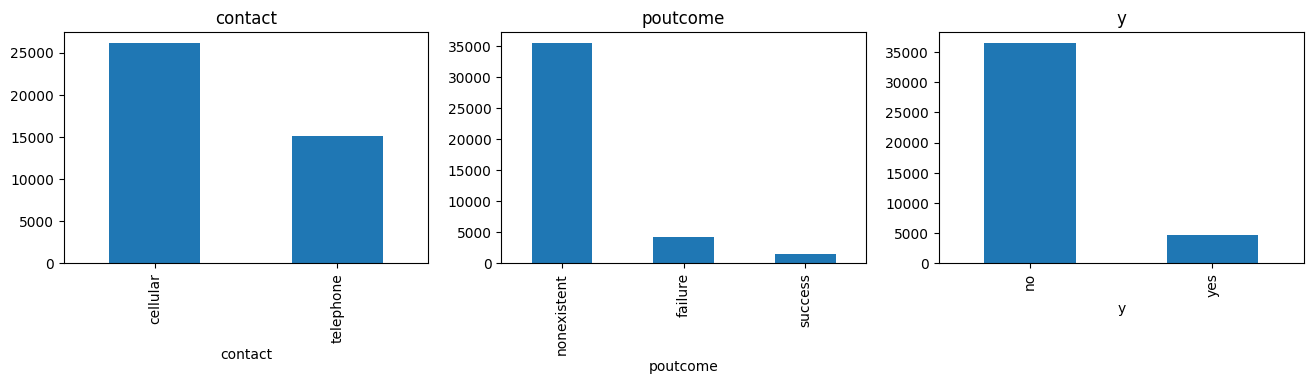

In [10]:
categorical_features = ['contact', 'poutcome', 'y']
fig, ax = plt.subplots(1,len(categorical_features),figsize = (16,3))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(ax=ax[i], kind="bar").set_title(categorical_feature)
    
fig.show()

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


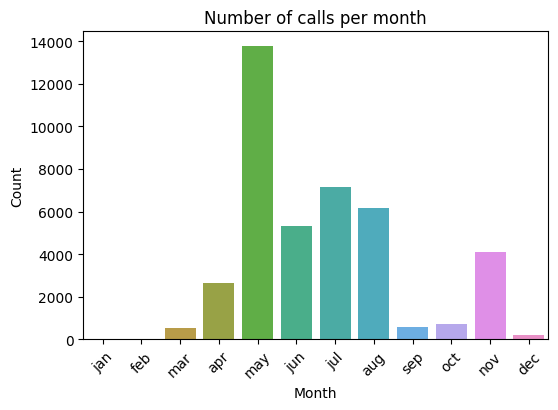

In [11]:
# Unique categories
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
# Creating CategoricalDtype
order_cat = pd.api.types.CategoricalDtype(categories = month_order, ordered = True)
# Change data type of month variable as order_cat data type
df.month = df.month.astype(order_cat)
plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, 
                   x = 'month')
ax.set(title = 'Number of calls per month', 
       xlabel = 'Month',
       ylabel = 'Count')
plt.xticks(rotation = 45);

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


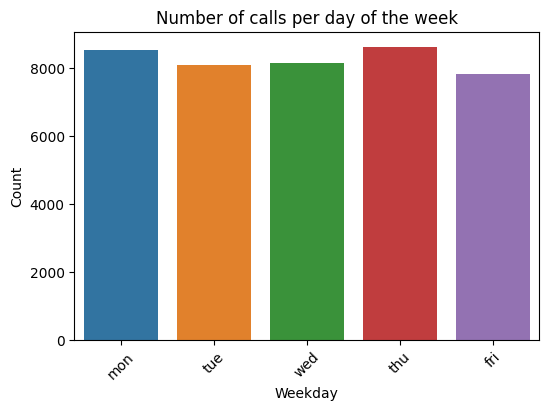

In [12]:
# Unique categories
dayinweek_order = ['mon','tue','wed','thu','fri']
# Creating CategoricalDtype
orderday_cat = pd.api.types.CategoricalDtype(categories = dayinweek_order, ordered = True)
# Change data type of month variable as order_cat data type
df.day_of_week = df.day_of_week.astype(orderday_cat)
plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, 
                   x = 'day_of_week')
ax.set(title = 'Number of calls per day of the week', 
       xlabel = 'Weekday',
       ylabel = 'Count')
plt.xticks(rotation = 45);

### 1.6 Checkig data distribution of numerical variables
#### 1.6.1 Checkig basic statistic

In [13]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- age: we see here average age of our clients is 40 years old, youngest person is 17 years old, and oldest one is 98 years old. It is unclear if the age data is current data, or is it at the day of conducting campaigns..
- duration: according to variable description, this feature will be deleted. 
- campaign: On average, every client participated in 2,5 campaign, out of total 56 campaigns. This is not statistically significant number of campaigns.
- pdays: Pdays feature is interesting. Most clients have never been contacted since the first quantile is also 999. This will be interesting to check in more detail..
- previous: this feature has average of 0,17 which means that 0,17 clients hav been contacted. Compared to pdays being mostly 999, this makes sense, but it would be usefull to check this variable together with pdays to gain more insights into stats for the clients which were contacted.

#### 1.6.2 Univariate analysis

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


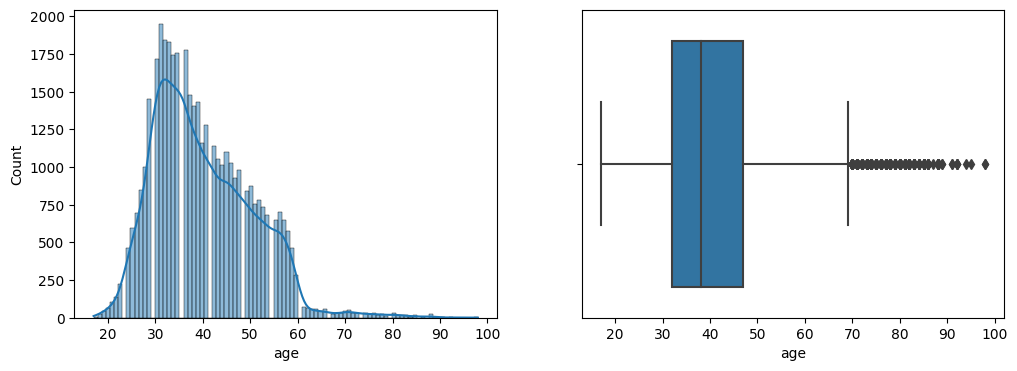

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


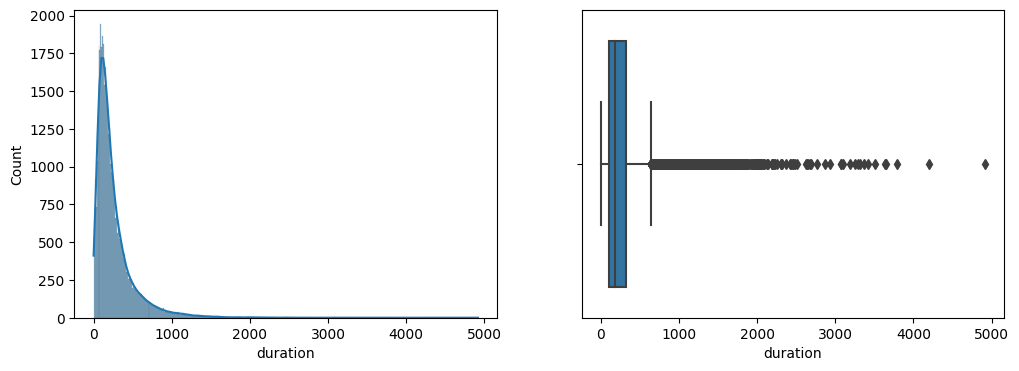

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


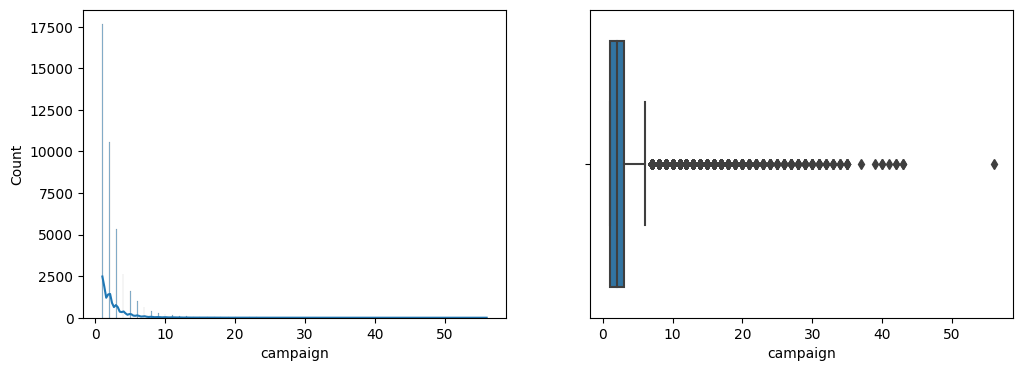

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


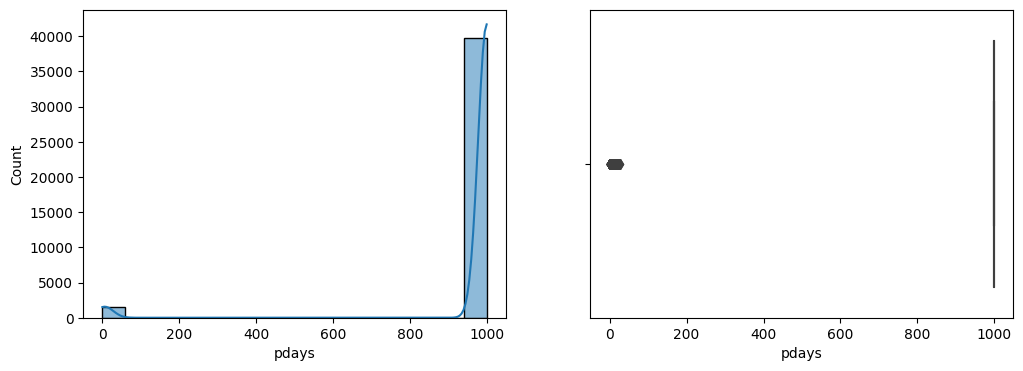

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


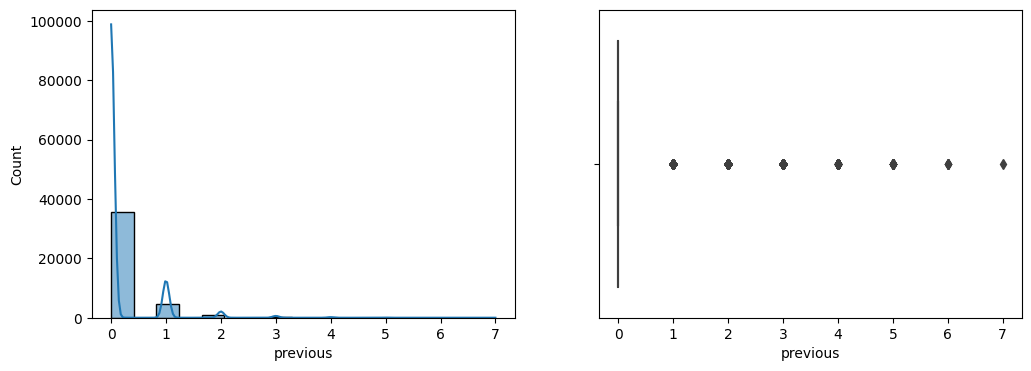

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


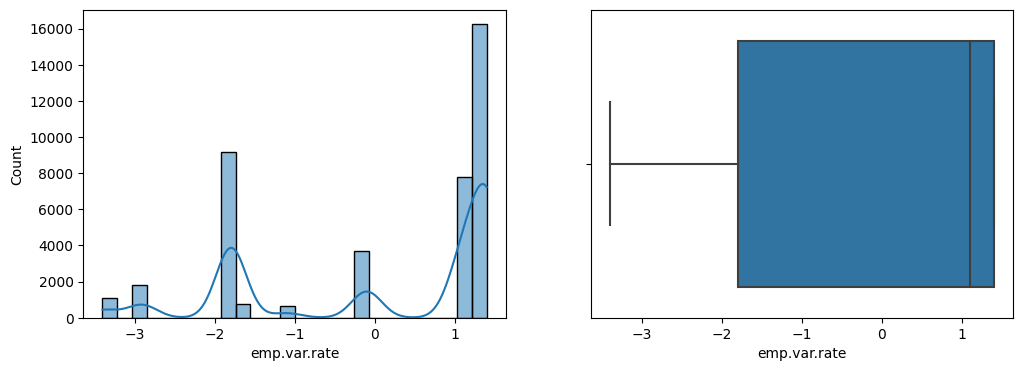

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


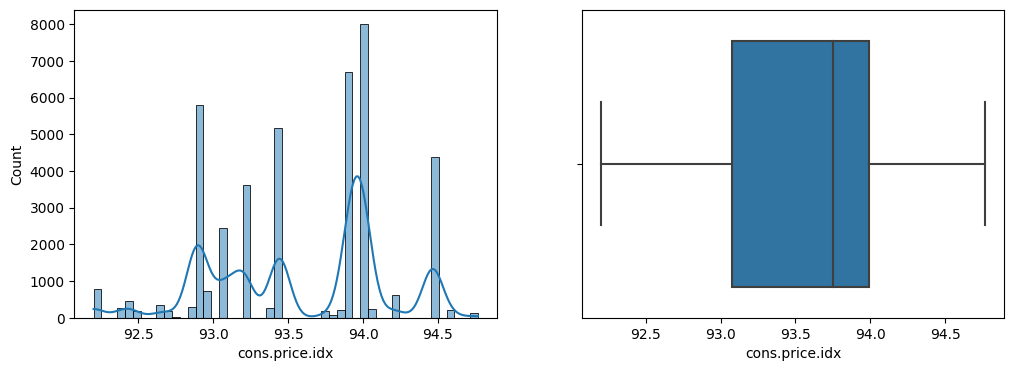

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


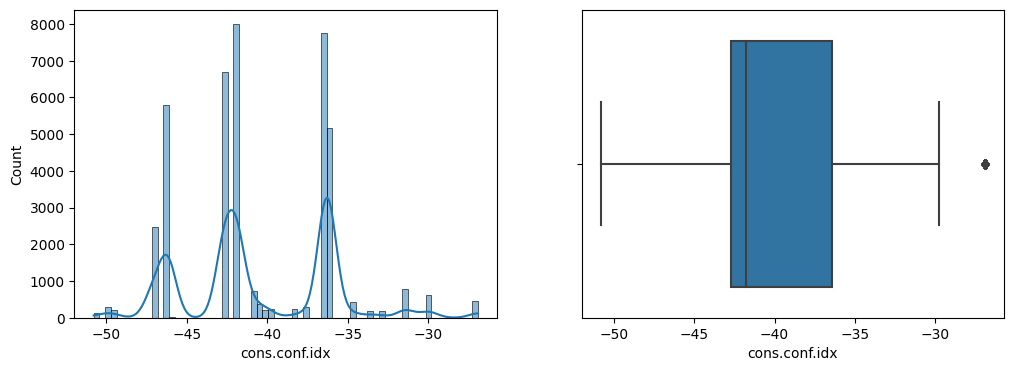

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


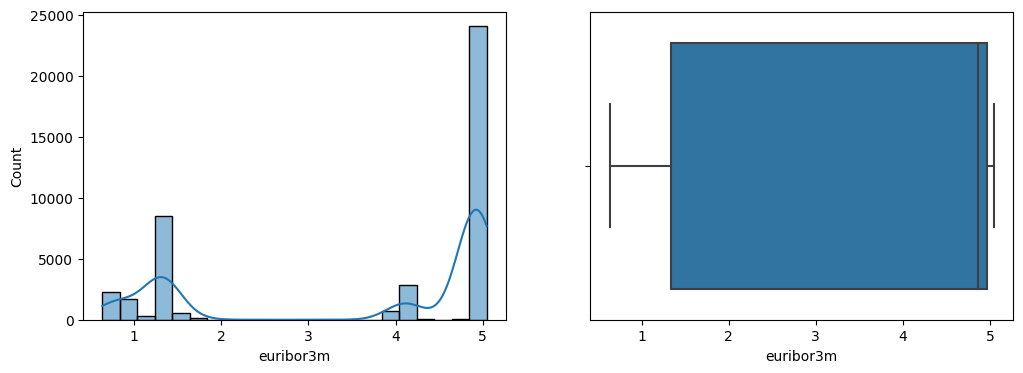

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


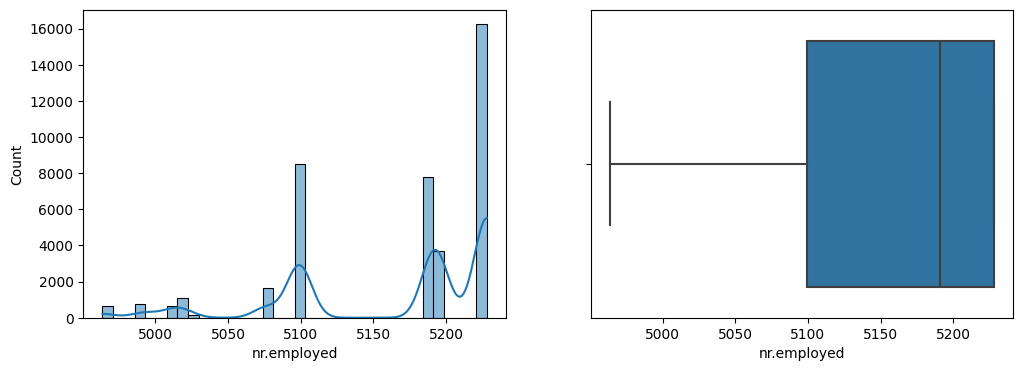

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

Let's look into more detail in pdays variable.

In [16]:
filter_999 = df['pdays'] == 999
data_999 = df.loc[filter_999]
data_999

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
previous_campaign1=data_999.groupby(['pdays','previous','poutcome'])['age'].count()

In [18]:
previous_campaign1

pdays  previous  poutcome   
999    0         nonexistent    35563
       1         failure         3696
       2         failure          349
       3         failure           50
       4         failure           12
       5         failure            2
       6         failure            1
Name: age, dtype: int64

In [19]:
filter_not999 = df['pdays'] != 999
data_not999 = df.loc[filter_not999]
data_not999

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.200,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41163,35,technician,divorced,basic.4y,no,yes,no,cellular,nov,tue,...,3,4,2,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41164,54,admin.,married,professional.course,no,no,no,cellular,nov,tue,...,2,10,1,success,-1.1,94.767,-50.8,1.035,4963.6,yes
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes


In [20]:
previous_campaign2 = data_not999.groupby(['pdays','previous','poutcome'])['age'].count()

In [21]:
previous_campaign2

pdays  previous  poutcome
0      1         success     7
       2         success     4
       3         success     2
       4         success     1
       5         success     1
                            ..
21     5         failure     1
22     1         success     3
25     2         failure     1
26     1         success     1
27     1         success     1
Name: age, Length: 113, dtype: int64

It also could be that here is an error .. Let's take a better look at this specific case..

In [22]:
filter_0 = data_not999['pdays'] == 0
data_0 = data_not999.loc[filter_0]
data_0

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25497,31,unemployed,single,professional.course,no,yes,no,cellular,nov,wed,...,1,0,1,success,-0.1,93.200,-42.0,4.120,5195.8,no
25996,35,management,married,university.degree,no,yes,yes,telephone,nov,wed,...,3,0,2,success,-0.1,93.200,-42.0,4.120,5195.8,no
30238,51,technician,married,professional.course,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30314,36,admin.,married,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30417,30,admin.,single,university.degree,no,yes,no,cellular,apr,thu,...,1,0,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes
30688,35,blue-collar,married,basic.6y,unknown,yes,no,cellular,may,tue,...,1,0,1,success,-1.8,92.893,-46.2,1.344,5099.1,no
40360,48,admin.,married,university.degree,no,yes,yes,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40364,27,student,single,university.degree,no,yes,no,cellular,aug,wed,...,1,0,3,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40365,28,student,single,basic.9y,no,yes,no,cellular,aug,wed,...,1,0,1,success,-1.7,94.027,-38.3,0.900,4991.6,yes
40376,27,student,single,university.degree,no,yes,no,telephone,aug,wed,...,1,0,5,success,-1.7,94.027,-38.3,0.900,4991.6,no


Maybe pdays = 0 should be positive.. That would mean since pdays=0, there was 0 days since we contacted client in previous campaign, and we actualy contacted him at lease once (previous>0) and there was a success in previous campaign (poutcome="success").

But on the other hand.. could this be that pdays=0 means today..?

Maybe 15 clients will not be significant to the model fitting.

### 1.7 Bivariate analysis

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


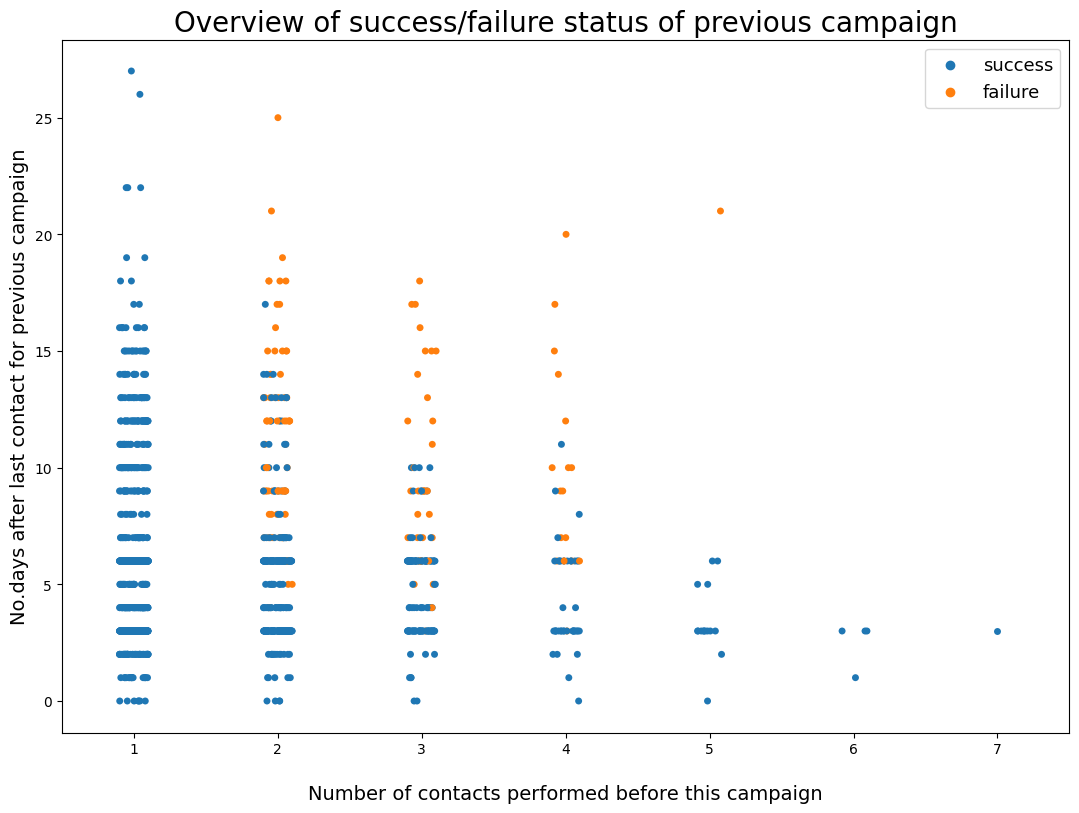

In [23]:
# Stripplots

plt.subplots(figsize = (13,9))
sns.stripplot(data = data_not999, 
              x = 'previous', 
              y = 'pdays', 
              hue ='poutcome')
plt.xlabel('Number of contacts performed before this campaign', fontsize = 14, labelpad = 20)     
plt.ylabel('No.days after last contact for previous campaign', fontsize = 14)
plt.title('Overview of success/failure status of previous campaign', 
          fontsize = 20)
plt.legend(loc = 1, prop = {'size': 13});           # Adjusting the legend's position and the size

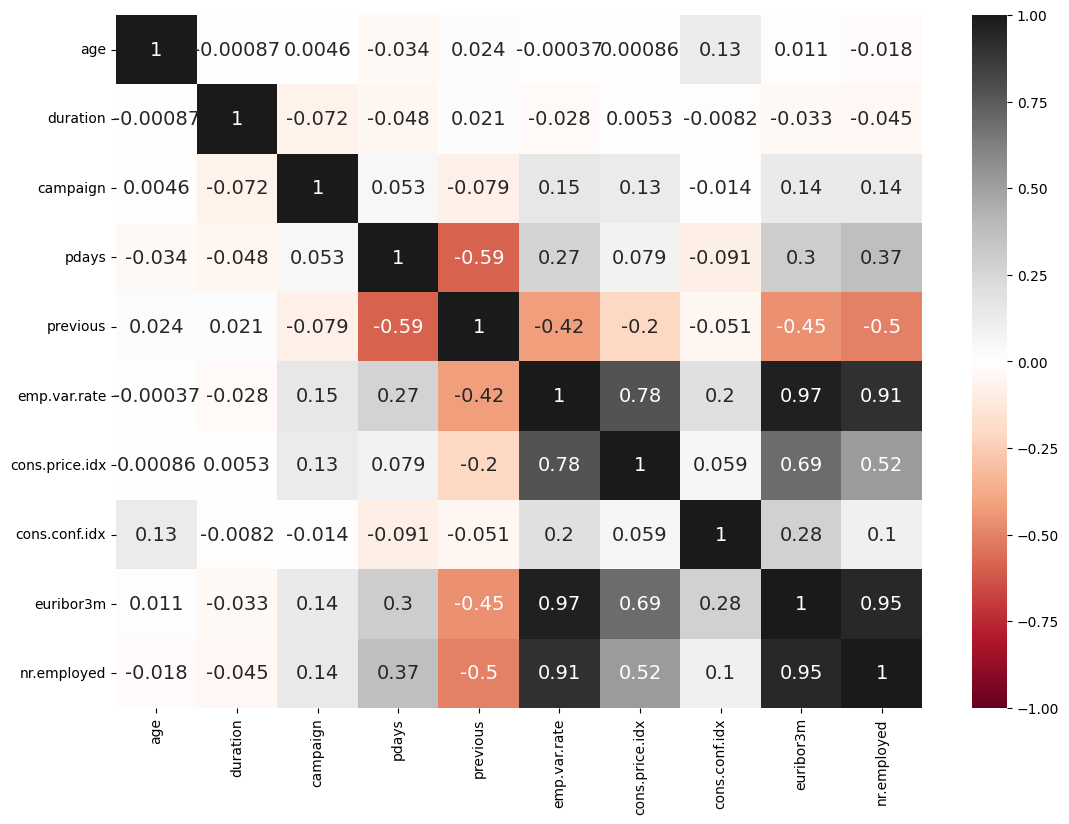

In [24]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr, 
            annot = True,                 # Correlation coeficients will be displayed in each cell
            annot_kws = {'fontsize':14},  # Setting a fontsize
            cmap = 'RdGy',                # Setting a color map
            vmin = -1, vmax = 1);         # Setting min and max for color map 

C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mmartinovic\06-DataScienceMasterclass\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

<Figure size 1000x1000 with 0 Axes>

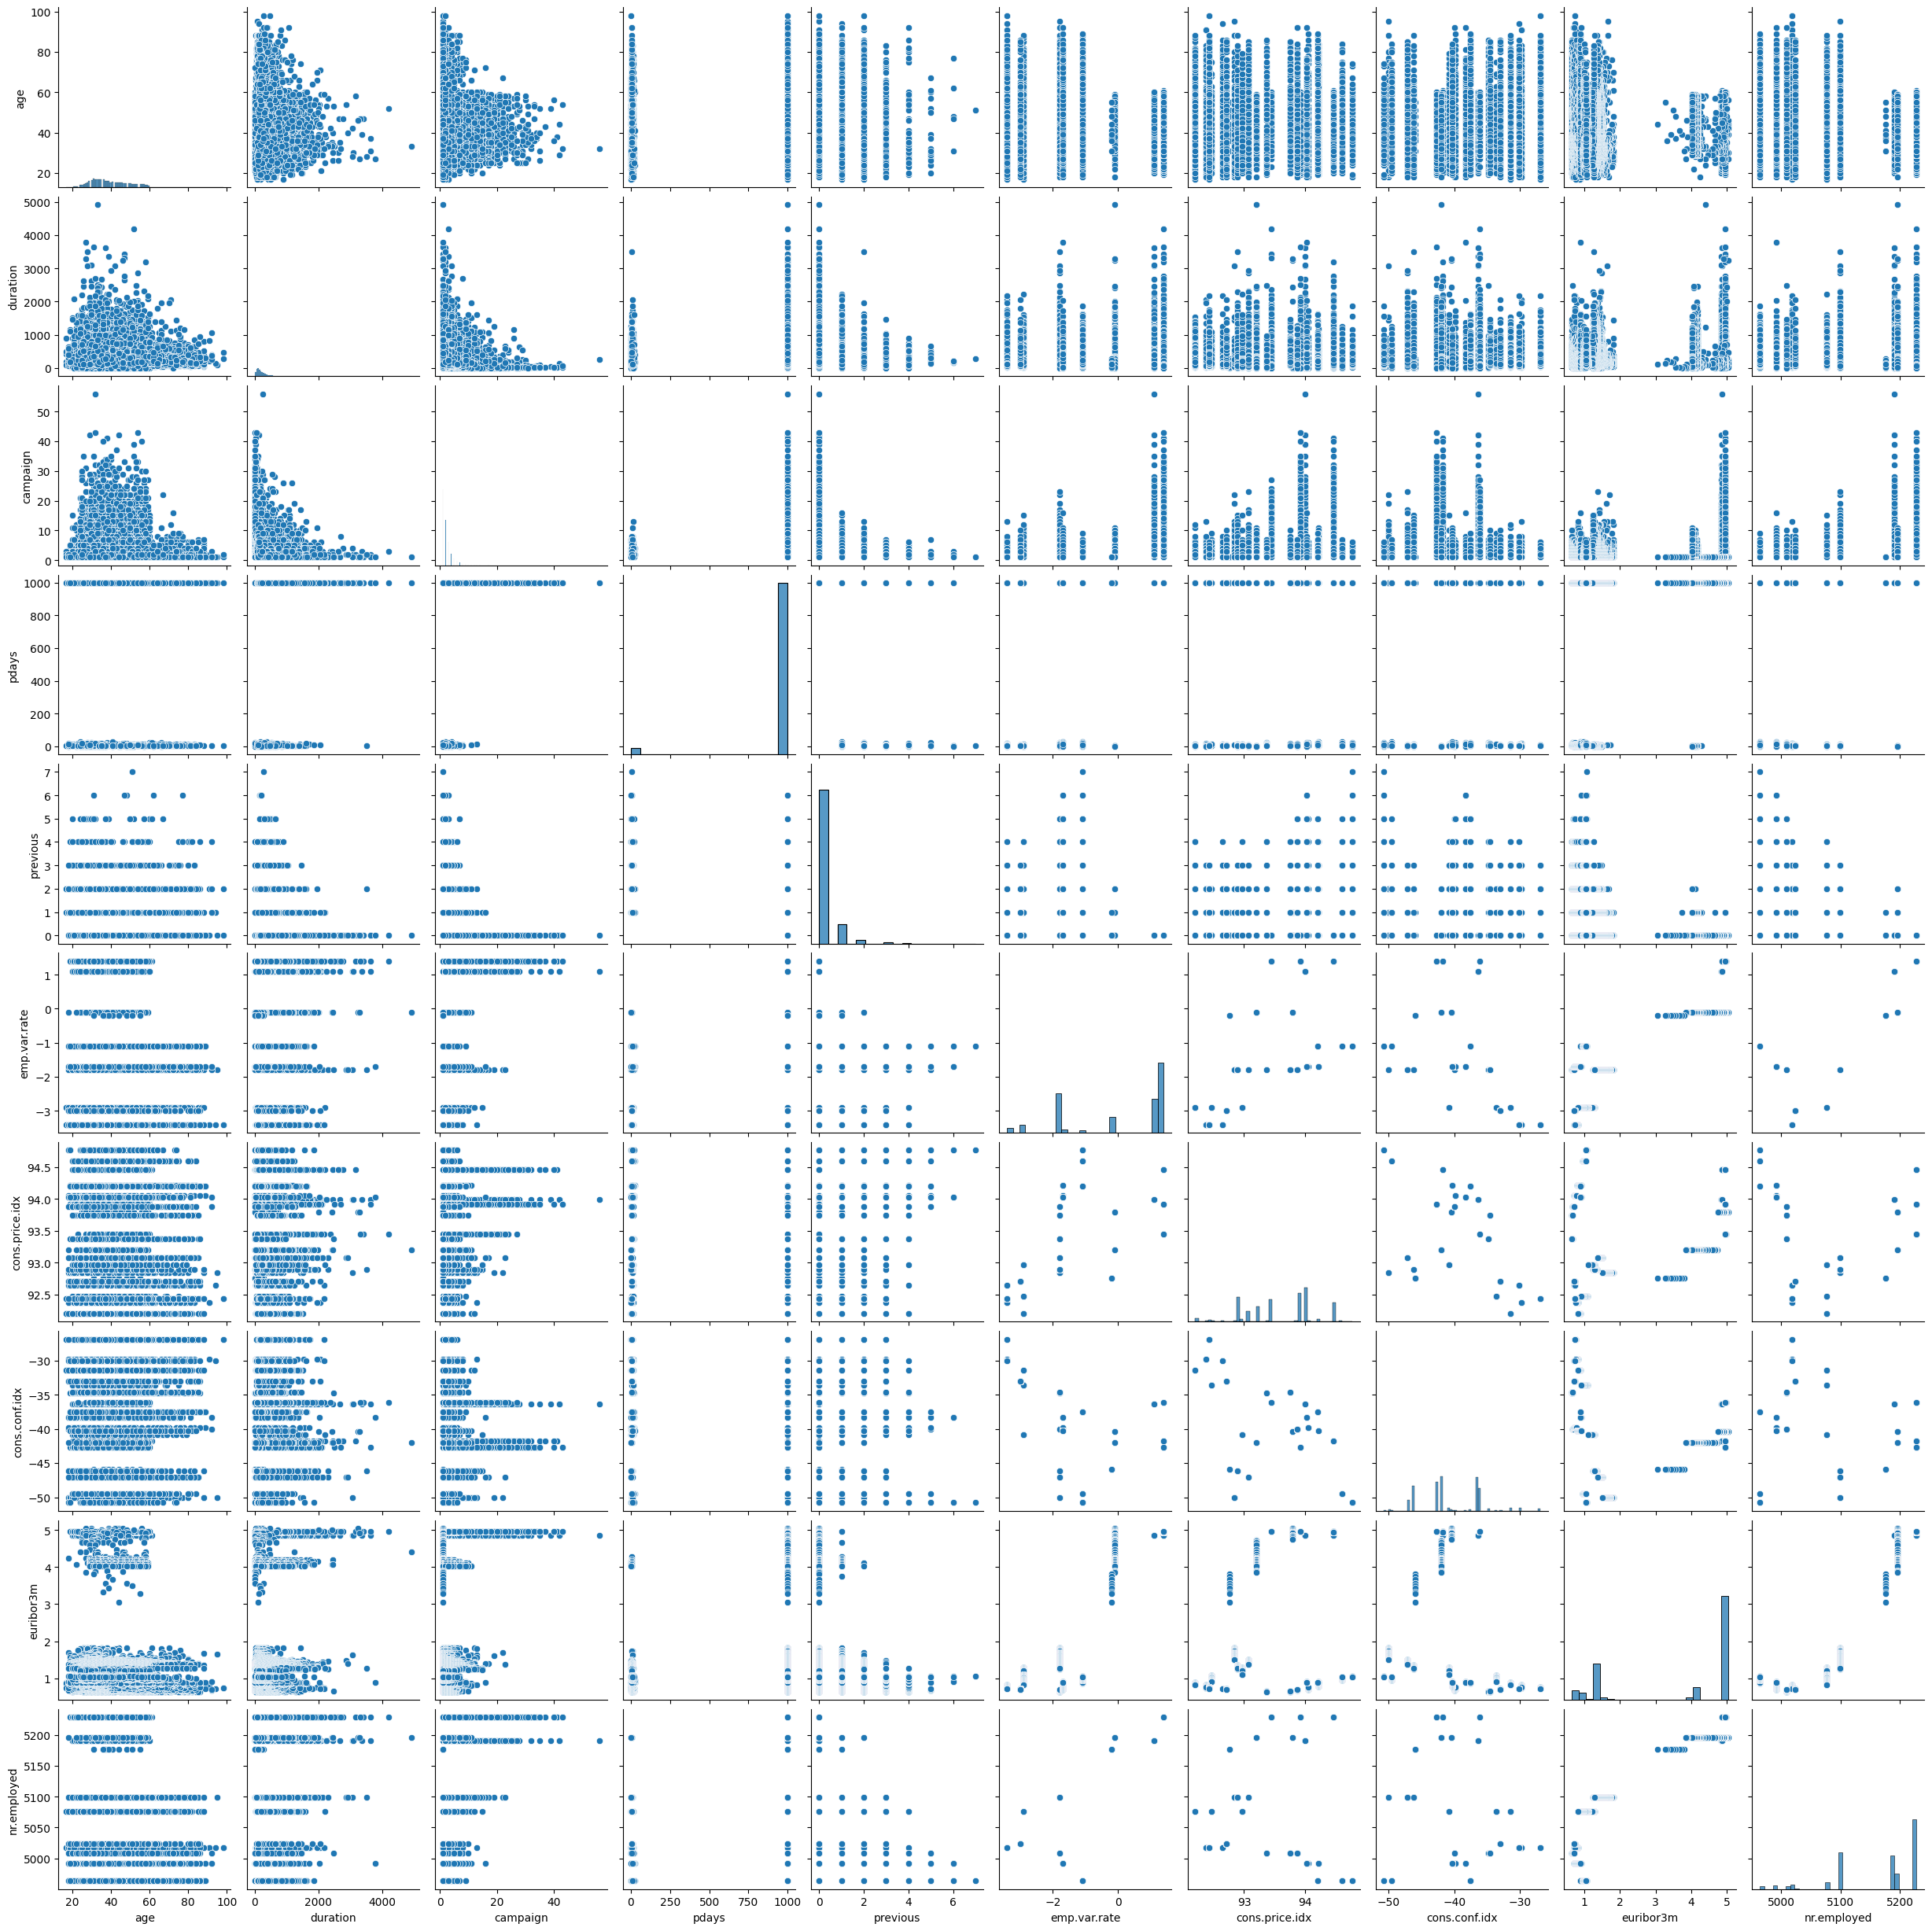

In [25]:
plt.figure(figsize=(10,10))
sns.pairplot(df.select_dtypes(include='number'))

The dendrogram allows me to observe trends deeper than the pairwise ones visible in the correlation heatmap.

### 1.8. Duplicate values

In [26]:
df.duplicated().sum()

12

In [27]:
# Remove duplicate rows
# Set inplace = True

df.drop_duplicates(inplace=True)

In [28]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             41176 non-null  object  
 2   marital         41176 non-null  object  
 3   education       41176 non-null  object  
 4   default         41176 non-null  object  
 5   housing         41176 non-null  object  
 6   loan            41176 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

### 1.9 Missing value ("unknown")

We have noticed before that there are no missing data in numerical data variables. There is just "unknown" data in categorical variables. We will now replace "unknown" to None in separate dataframe (df2), so Pandas can recognize it appropriately and we can analyse it.

In [29]:
df2=df.replace(to_replace='unknown',value=None,inplace=False)
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,None,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41176 non-null  int64   
 1   job             40846 non-null  object  
 2   marital         41096 non-null  object  
 3   education       39446 non-null  object  
 4   default         32580 non-null  object  
 5   housing         40186 non-null  object  
 6   loan            40186 non-null  object  
 7   contact         41176 non-null  object  
 8   month           41176 non-null  category
 9   day_of_week     41176 non-null  category
 10  duration        41176 non-null  int64   
 11  campaign        41176 non-null  int64   
 12  pdays           41176 non-null  int64   
 13  previous        41176 non-null  int64   
 14  poutcome        41176 non-null  object  
 15  emp.var.rate    41176 non-null  float64 
 16  cons.price.idx  41176 non-null  float64 
 17  cons.conf.idx   4

Ok, this looks good. Let's check now if number of "empty" data fits to previous "unknown".

In [31]:
df2.isnull().sum()

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

It looks good. Let's check with heatmap how "empty" values are connected.

<AxesSubplot: >

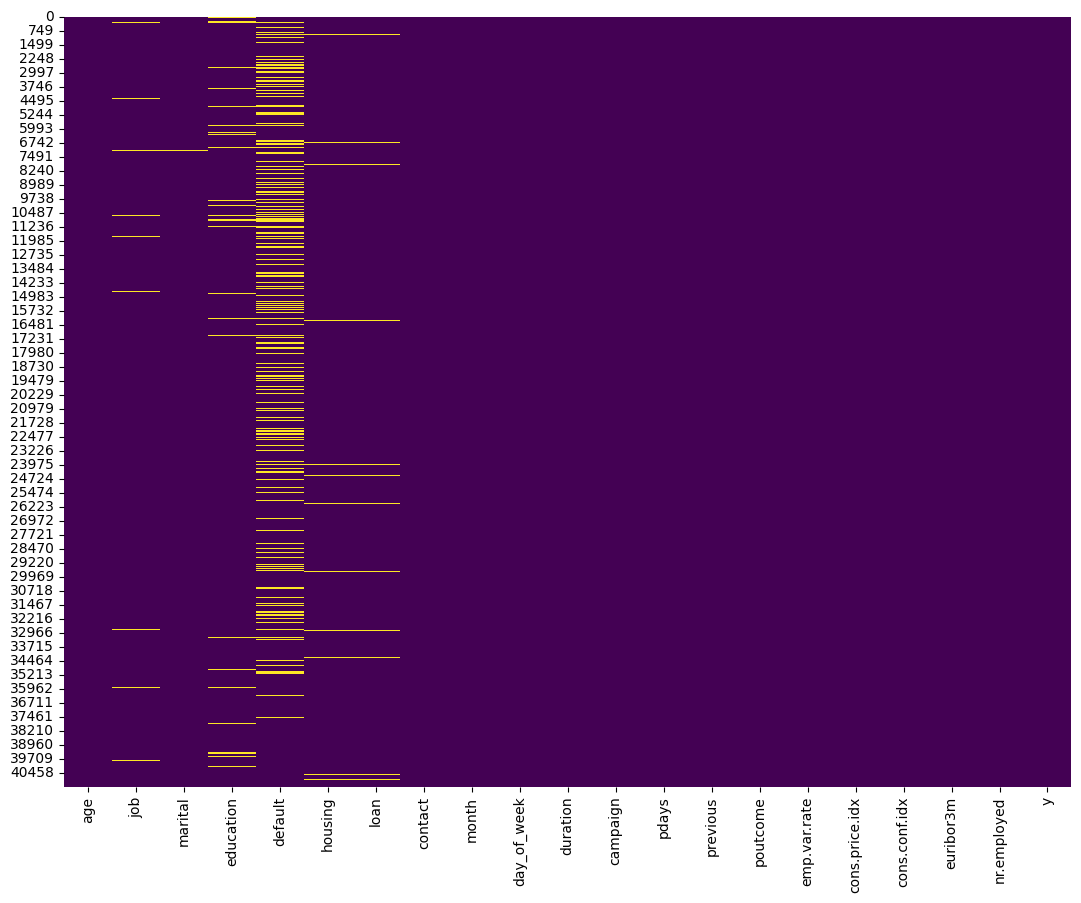

In [32]:
plt.figure(figsize=(13,10))
sns.heatmap(df2.isnull(),cbar=False,cmap='viridis')

We see here visually what we saw before with graphs that *default* contains a lot of empty data. We also see that empty data could be similar in *housing* and *loan* variable. We will see this in correlation map.

<AxesSubplot: >

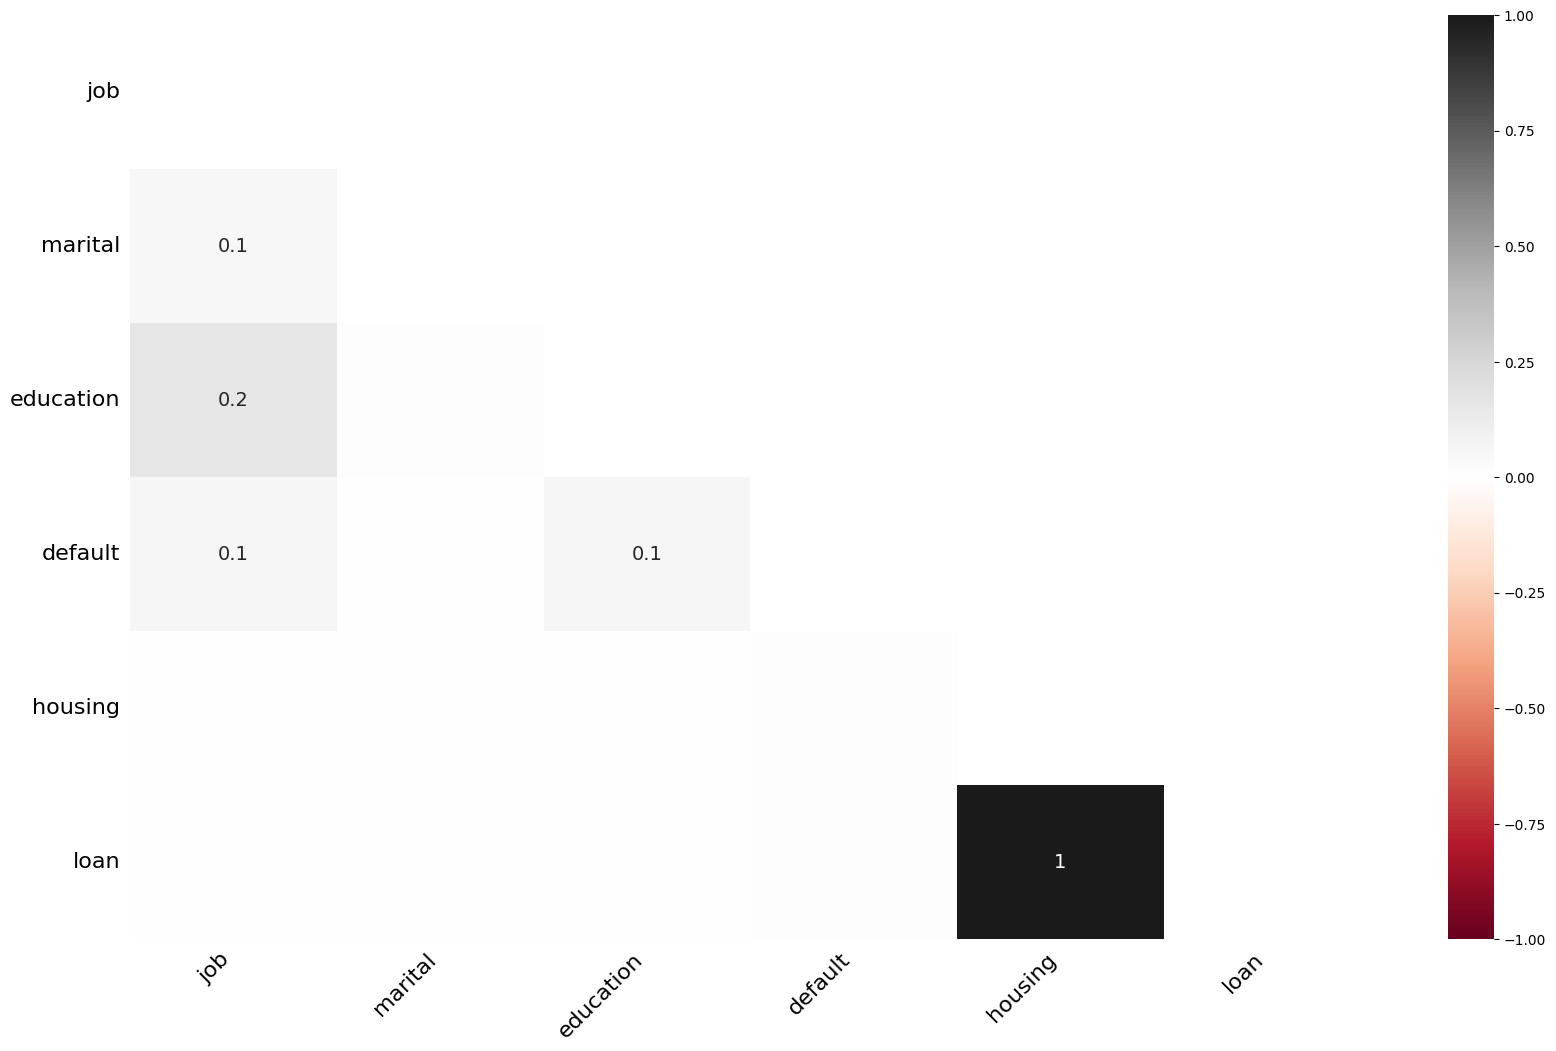

In [33]:
import missingno as msno
msno.heatmap(df2, cmap = 'RdGy')

Hereby it is confirmed that for each *loan* information that is missing, for the same client also *housing* is missing. 

Next step is to use some appropriate model for classification problem and apply feature engineering and selection to it.

## 2. Feature Engineering and selection

It is already visible above that we are working with numerical and categorical variables. There are no empty or error values in numerical data types, but we have 'unknown' in categorical data type.

### 2.1 Numerical variables

- age             
- campaign  
- pdays 
- previous
- duration *
- emp.var.rate
- cons.price.idx
- cons.conf.idx
- euribor3m
- nr.employed

What to do?
- first we will delete variable *duration*.    
- next, we will standardize numerical variables using standard scaler


 ### 2.2 Categorical variables

#### 2.2.1 - Binary

Variable *y* has only yes or no values, and it will be our target variable. So we will map this one: no and yes with 0 and 1. 

#### 2.2.2 - Ordinal
No ordinal data in this data set.

#### 2.2.3 - Non-ordinal

- job
- marital
- education
- default *
- housing
- loan
- contact 
- month
- day_of_week 
- poutcome

What to do?
- first we will delete variable *default*.
- apply onehotencoding (treat 'unknown' as an information rather then the absence of information)

### 2.3. Final to do list after exploration

- import data
- delete duplicates
- map y to 0 and 1
- drop *default* and *duration* column
- split data set to training and testing data set
- apply scaling to train and test data set for numerical values
- apply one hot encoding to train and test data set for categorical values.

Next (in separate chapters)
- choose model
- calculate metrics.

In [34]:
df = pd.read_csv(r"C:\Users\mmartinovic\06-DataScienceMasterclass\bank-additional-full\bank-additional-full.csv", sep=";")

In [35]:
print(df.shape)

(41188, 21)


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
#check if the size is ok
print(df.shape)

(41176, 21)


In [38]:
df['y']=df['y'].map({'yes': 1, 'no': 0})

In [39]:
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

Ok, correctly is updated *y*

In [40]:
# drop default and duration column
df.drop(["default", "duration"], axis=1, inplace=True)

In [41]:
print(df.shape)

(41176, 19)


In [42]:
# Import train_test_split to separate train and test set
from sklearn.model_selection import train_test_split
# Import MinMaxScaler to scale the features
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Import OneHotEncoder for one hot encoding 
from sklearn.preprocessing import OneHotEncoder
# Import LabelEncoder for target feature encoding
from sklearn.preprocessing import LabelEncoder
# Import metrics to calculate accuracy measure and confusion matrix
from sklearn import metrics

from sklearn import preprocessing

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

In [43]:
# here we will define set of explainatory variables X and dependant "target" variable y.
X = df.drop('y', axis=1)
y = df['y']

In [44]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Get the shape of training and testing set
X_train.shape, X_test.shape

((28823, 18), (12353, 18))

In [45]:
# Identify numerical and categorical columns

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [46]:
# Perform StandardScaler on numerical variables
numerical_transformer = StandardScaler()

In [47]:
# Perform OneHotEncoder on categorical variables
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop=None)

In [48]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [49]:
# Apply the transformations to the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [50]:
# Convert the transformed data back to DataFrame for easier inspection
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=preprocessor.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())

In [51]:
# Display the shapes to confirm the transformations
(X_train_transformed_df.shape, X_test_transformed_df.shape)

((28823, 59), (12353, 59))

In [52]:
X_train_transformed_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28823 entries, 0 to 28822
Data columns (total 59 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   num__age                            28823 non-null  float64
 1   num__campaign                       28823 non-null  float64
 2   num__pdays                          28823 non-null  float64
 3   num__previous                       28823 non-null  float64
 4   num__emp.var.rate                   28823 non-null  float64
 5   num__cons.price.idx                 28823 non-null  float64
 6   num__cons.conf.idx                  28823 non-null  float64
 7   num__euribor3m                      28823 non-null  float64
 8   num__nr.employed                    28823 non-null  float64
 9   cat__job_admin.                     28823 non-null  float64
 10  cat__job_blue-collar                28823 non-null  float64
 11  cat__job_entrepreneur               28823

## 3. Logistic regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
# Initialize the logistic regression model
logistic = LogisticRegression(max_iter=1000, random_state=42)

In [55]:
# Train the model on the transformed training data
logistic.fit(X_train_transformed_df, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [56]:
# Make predictions on the transformed testing data
y_hat = logistic.predict(X_test_transformed_df)
y_hat_proba = logistic.predict_proba(X_test_transformed_df)[:, 1]

In [57]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat_proba)

In [58]:
# Display the evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc
}

In [59]:
print(evaluation_metrics)

{'Accuracy': 0.8975147737391727, 'Precision': 0.670995670995671, 'Recall': 0.21769662921348315, 'F1 Score': 0.32873806998939553, 'ROC-AUC Score': 0.7954220731154408}


In [60]:
metrics.confusion_matrix(y_test, y_hat)

array([[10777,   152],
       [ 1114,   310]], dtype=int64)

### 4. Decision tree model

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Initialize the decision tree classifier
dtree = DecisionTreeClassifier(random_state=42)

In [63]:
# Train the model on the transformed training data
dtree.fit(X_train_transformed_df, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
# Make predictions on the transformed testing data
y_hat = dtree.predict(X_test_transformed_df)
y_hat_proba = dtree.predict_proba(X_test_transformed_df)[:, 1]

In [65]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat_proba)

In [66]:
# Display the evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc
}

In [67]:
print(evaluation_metrics)

{'Accuracy': 0.8409293289079576, 'Precision': 0.3219223173140224, 'Recall': 0.3433988764044944, 'F1 Score': 0.33231396534148827, 'ROC-AUC Score': 0.6259262093636043}


In [68]:
metrics.confusion_matrix(y_test, y_hat)

array([[9899, 1030],
       [ 935,  489]], dtype=int64)

### 5. Neural network model

In [69]:
from sklearn.neural_network import MLPClassifier

In [70]:
# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

In [71]:
# Train the model on the transformed training data
mlp.fit(X_train_transformed_df, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [72]:
# Make predictions on the transformed testing data
y_hat = mlp.predict(X_test_transformed_df)
y_hat_proba = mlp.predict_proba(X_test_transformed_df)[:, 1]

In [73]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat_proba)

In [74]:
# Display the evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc
}

In [75]:
print(evaluation_metrics)

{'Accuracy': 0.876143446935967, 'Precision': 0.4456967213114754, 'Recall': 0.30547752808988765, 'F1 Score': 0.3625, 'ROC-AUC Score': 0.7266033905257736}


In [76]:
metrics.confusion_matrix(y_test, y_hat)

array([[10388,   541],
       [  989,   435]], dtype=int64)

### 6. K-Nearest Neighbors 

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [79]:
# Train the model on the transformed training data
knn.fit(X_train_transformed_df, y_train)

KNeighborsClassifier()

In [80]:
# Make predictions on the transformed testing data
y_hat = knn.predict(X_test_transformed_df)
y_hat_proba = knn.predict_proba(X_test_transformed_df)[:, 1]

In [81]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)
roc_auc = roc_auc_score(y_test, y_hat_proba)

In [82]:
# Display the evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc
}

In [83]:
print(evaluation_metrics)

{'Accuracy': 0.888610054237837, 'Precision': 0.5328767123287671, 'Recall': 0.2731741573033708, 'F1 Score': 0.36118848653667596, 'ROC-AUC Score': 0.7301216303186759}


In [84]:
metrics.confusion_matrix(y_test, y_hat)

array([[10588,   341],
       [ 1035,   389]], dtype=int64)

### Conclusion

In term of accuracy, Logistic regression model is the best, because it has highest accuracy metric value - which means that it correctly predicted target variable for largest set of customers.

Regarding of confusion matrix, Logistic regression model also gives best result, because of the value which belongs to false negative (152) which is smallest compared to other models. I am thinking that in this problem, it is best to lose least amount of predicted potential contacts, which corresponds to false negative number in confusion matrix.